# AI-Driven Coastal Security Project
This notebook explores the dummy datasets and builds baseline models for:
- Vessel anomaly detection
- Drone threat classification
- Cybersecurity intrusion detection

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
## Load Datasets
import os

print("Current working directory:", os.getcwd())
print("Files in /data/:", os.listdir('data/'))


Current working directory: /workspaces/ai-coastal-security-defense/notebooks


FileNotFoundError: [Errno 2] No such file or directory: 'data/'

In [10]:
vessel_data = pd.read_csv('../data/vessel_data.csv')
drone_data = pd.read_csv('../data/drone_data.csv')
cyber_data = pd.read_csv('../data/cyber_data.csv')

print(vessel_data.head())
print(drone_data.head())
print(cyber_data.head())


  vessel_id   latitude  longitude  speed_knots  heading_deg  is_anomalous
0   VES1000  20.123620  87.094485     5.553988   186.869443             0
1   VES1001  21.852143  86.608289    16.257028   172.505476             0
2   VES1002  21.195982  85.928583    26.188375     9.231144             0
3   VES1003  20.795975  87.441385    21.966747   122.849218             0
4   VES1004  19.468056  87.054194    24.196834   136.870423             0
     frame_id object_detected  confidence_score  is_threat
0  FRAME10000      cargo_ship          0.737329          0
1  FRAME10001         unknown          0.506550          0
2  FRAME10002            none          0.700772          0
3  FRAME10003      cargo_ship          0.817409          0
4  FRAME10004            boat          0.507599          0
    log_id       ip_address  port  packet_size  intrusion_attempt
0  LOG5000  192.168.227.192    80         2613                  0
1  LOG5001   192.168.31.242    80         1873                  0
2  L

## Anomaly Detection on Vessel Data

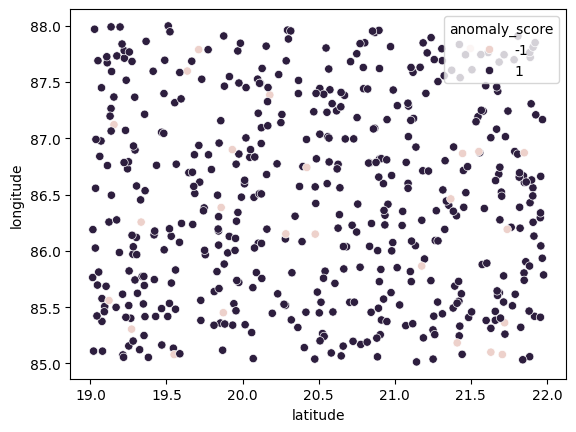

In [11]:
iso_forest = IsolationForest(contamination=0.05)
vessel_data['anomaly_score'] = iso_forest.fit_predict(vessel_data[['speed_knots', 'heading_deg']])
sns.scatterplot(data=vessel_data, x='latitude', y='longitude', hue='anomaly_score')
plt.show()

## Threat Classification on Drone Data

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       271
           1       0.15      0.10      0.12        29

    accuracy                           0.86       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.83      0.86      0.84       300



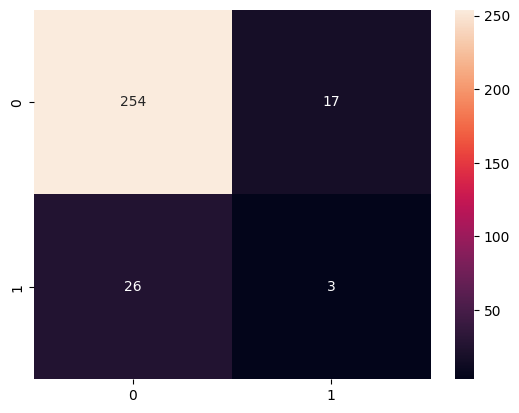

In [12]:
X = drone_data[['confidence_score']]
y = drone_data['is_threat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()